In [2]:
import os 
os.chdir("C:/Users/admin/Datasets2022/Dataset")

In [3]:
import numpy as np 
import pandas as pd 


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 100
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")

from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay, classification_report, auc, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import joblib

<h1> Data Exploration

In [4]:
train_a = pd.read_csv("comp_datasets_train/region_A_train.csv")
train_b = pd.read_csv("comp_datasets_train/region_B_train.csv")
train_c = pd.read_csv("comp_datasets_train/region_C_train.csv")
train_d = pd.read_csv("comp_datasets_train/region_D_train.csv")
train_e = pd.read_csv("comp_datasets_train/region_E_train.csv")

test_a = pd.read_csv("comp_datasets_test/region_A_test.csv")
test_b = pd.read_csv("comp_datasets_test/region_B_test.csv")
test_c = pd.read_csv("comp_datasets_test/region_C_test.csv")
test_d = pd.read_csv("comp_datasets_test/region_D_test.csv")
test_e = pd.read_csv("comp_datasets_test/region_E_test.csv")

labels_df = pd.read_csv("comp_datasets_train/solution_train.csv")

In [5]:
labels_df

,date,label
0,a8c6911b,N
1,eebdce12,N
2,6fb420a6,L
3,3bf8b132,N
4,e86629c2,N
...,...,...
561,a7d79d03,N
562,2a064f46,N
563,eedff818,L
564,66706800,N


In [6]:
train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     566 non-null    object 
 1   avg.temp                 566 non-null    float64
 2   max.temp                 566 non-null    float64
 3   min.temp                 566 non-null    float64
 4   precipitation            566 non-null    float64
 5   avg.wind.speed           566 non-null    float64
 6   max.wind.speed           566 non-null    float64
 7   max.wind.speed.dir       566 non-null    object 
 8   max.inst.wind.speed      566 non-null    float64
 9   max.inst.wind.speed.dir  566 non-null    object 
 10  min.atmos.pressure       566 non-null    float64
dtypes: float64(8), object(3)
memory usage: 48.8+ KB


Since the dataset are divided by region and have a date key we can group them in a one dataset 

In [7]:
train_all = pd.concat([train_a ,train_b ,train_c ,train_d ,train_e], keys=["A", "B", "C", "D", "E"])
train_all

date  avg.temp  max.temp  min.temp  precipitation  avg.wind.speed  \
A 0    229b70a3       3.3      10.2      -2.4            0.0             2.9   
  1    3134f4ff       5.7      13.7      -2.9            0.0             3.6   
  2    dbfaf910      13.8      20.0       9.0            0.0             5.3   
  3    3aea0cf0      11.4      19.3       5.8            0.0             4.2   
  4    f0227f56       2.4       7.7       0.3           43.5             0.9   
...         ...       ...       ...       ...            ...             ...   
E 561  91b2797d       6.3      13.1       0.3            0.0             0.6   
  562  b807fd87       6.2      13.5       0.3            0.0             0.8   
  563  8e0a48e0       9.0      15.9       2.4            0.0             0.6   
  564  9df85983       5.3      13.9       0.1            0.0             1.0   
  565  c9d4fe7c       6.4      15.3      -0.2            0.0             0.7   

       max.wind.speed max.wind.speed.dir  max.inst.wind.speed  \
A 0               9.3                  W                 14.3   
  1              10.7                  W                 15.8   
  2               9.4                 SW                 15.2   
  3              10.1                 SW                 20.6   
  4               3.7                 SW                  5.7   
...               ...                ...                  ...   
E 561             2.2                  S                  4.3   
  562             2.3                 SW                  6.3   
  563             2.4                 NW                  5.7   
  564             3.0                  S                  6.9   
  565             2.1                 NW                  5.5   

      max.inst.wind.speed.dir  min.atmos.pressure  
A 0                         W              1015.1  
  1                         W              1011.3  
  2                         W              1004.2  
  3                        SW              1001.7  
  4                        SW              1003.5  
...                       ...                 ...  
E 561                       S                 NaN  
  562                       W                 NaN  
  563                       W                 NaN  
  564                      NW                 NaN  
  565                       N                 NaN  

[2830 rows x 11 columns]

we'll create a new index for the data and drop the old one

In [183]:
train_all.describe()

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,min.atmos.pressure
count,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,566.000000
mean,13.920035,20.310106,9.086290,6.954594,1.529081,4.311519,8.177067,1010.216254
std,8.276033,8.604235,8.809846,17.937398,0.942901,2.259748,3.343470,6.931126
min,-7.800000,-4.800000,-12.900000,0.000000,0.100000,0.800000,1.800000,980.400000
25%,6.900000,13.800000,1.200000,0.000000,0.900000,2.500000,5.800000,1005.800000
50%,15.000000,21.100000,9.700000,0.000000,1.200000,3.800000,7.500000,1009.900000
75%,21.000000,26.975000,17.100000,4.000000,2.000000,5.700000,10.100000,1014.775000
max,29.200000,39.500000,24.400000,200.500000,6.000000,13.300000,21.500000,1029.600000


In [184]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2830 entries, ('A', 0) to ('E', 565)
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2830 non-null   object 
 1   avg.temp                 2830 non-null   float64
 2   max.temp                 2830 non-null   float64
 3   min.temp                 2830 non-null   float64
 4   precipitation            2830 non-null   float64
 5   avg.wind.speed           2830 non-null   float64
 6   max.wind.speed           2830 non-null   float64
 7   max.wind.speed.dir       2830 non-null   object 
 8   max.inst.wind.speed      2830 non-null   float64
 9   max.inst.wind.speed.dir  2830 non-null   object 
 10  min.atmos.pressure       566 non-null    float64
dtypes: float64(8), object(3)
memory usage: 251.7+ KB


In [8]:
train_all_lvls = train_all.reset_index()
train_all_lvls.rename(columns = {"level_0": "region"}, inplace=True)
train_all_lvls.drop(columns=['level_1'], inplace=True)
train_all_lvls.head()

,region,date,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.wind.speed.dir,max.inst.wind.speed,max.inst.wind.speed.dir,min.atmos.pressure
0,A,229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,W,14.3,W,1015.1
1,A,3134f4ff,5.7,13.7,-2.9,0.0,3.6,10.7,W,15.8,W,1011.3
2,A,dbfaf910,13.8,20.0,9.0,0.0,5.3,9.4,SW,15.2,W,1004.2
3,A,3aea0cf0,11.4,19.3,5.8,0.0,4.2,10.1,SW,20.6,SW,1001.7
4,A,f0227f56,2.4,7.7,0.3,43.5,0.9,3.7,SW,5.7,SW,1003.5


<h3>We'll explore the labels data and its distribution

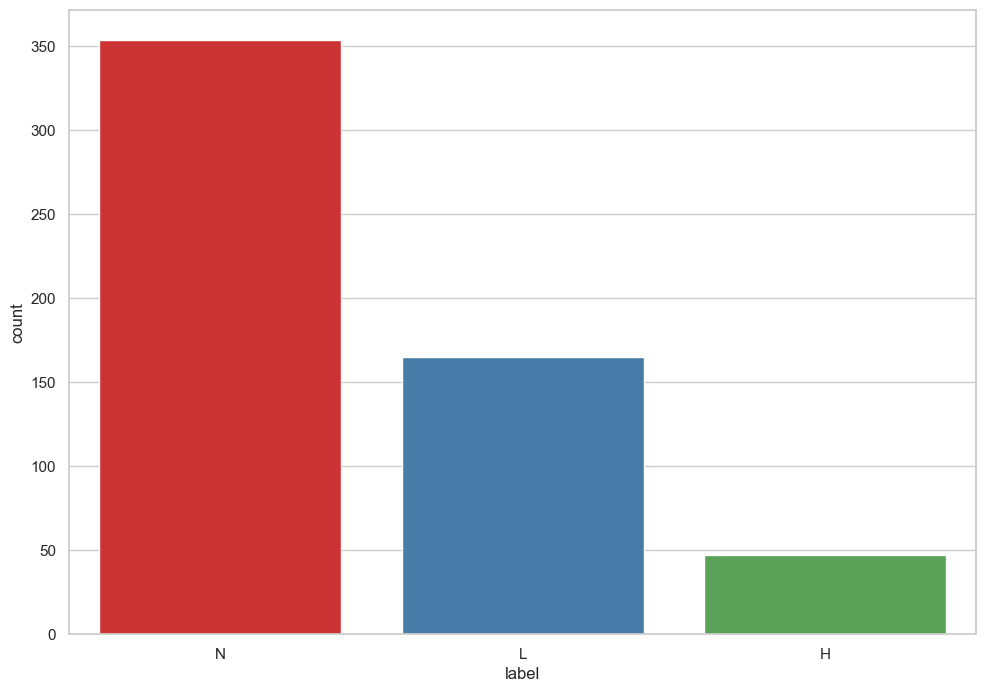

In [9]:
sns.countplot(x = 'label', data = labels_df, palette="Set1");


In [10]:
train_all_lvls.columns

Index(['region', 'date', 'avg.temp', 'max.temp', 'min.temp', 'precipitation',
       'avg.wind.speed', 'max.wind.speed', 'max.wind.speed.dir',
       'max.inst.wind.speed', 'max.inst.wind.speed.dir', 'min.atmos.pressure'],
      dtype='object')

<h3>Plotting the features by Region 

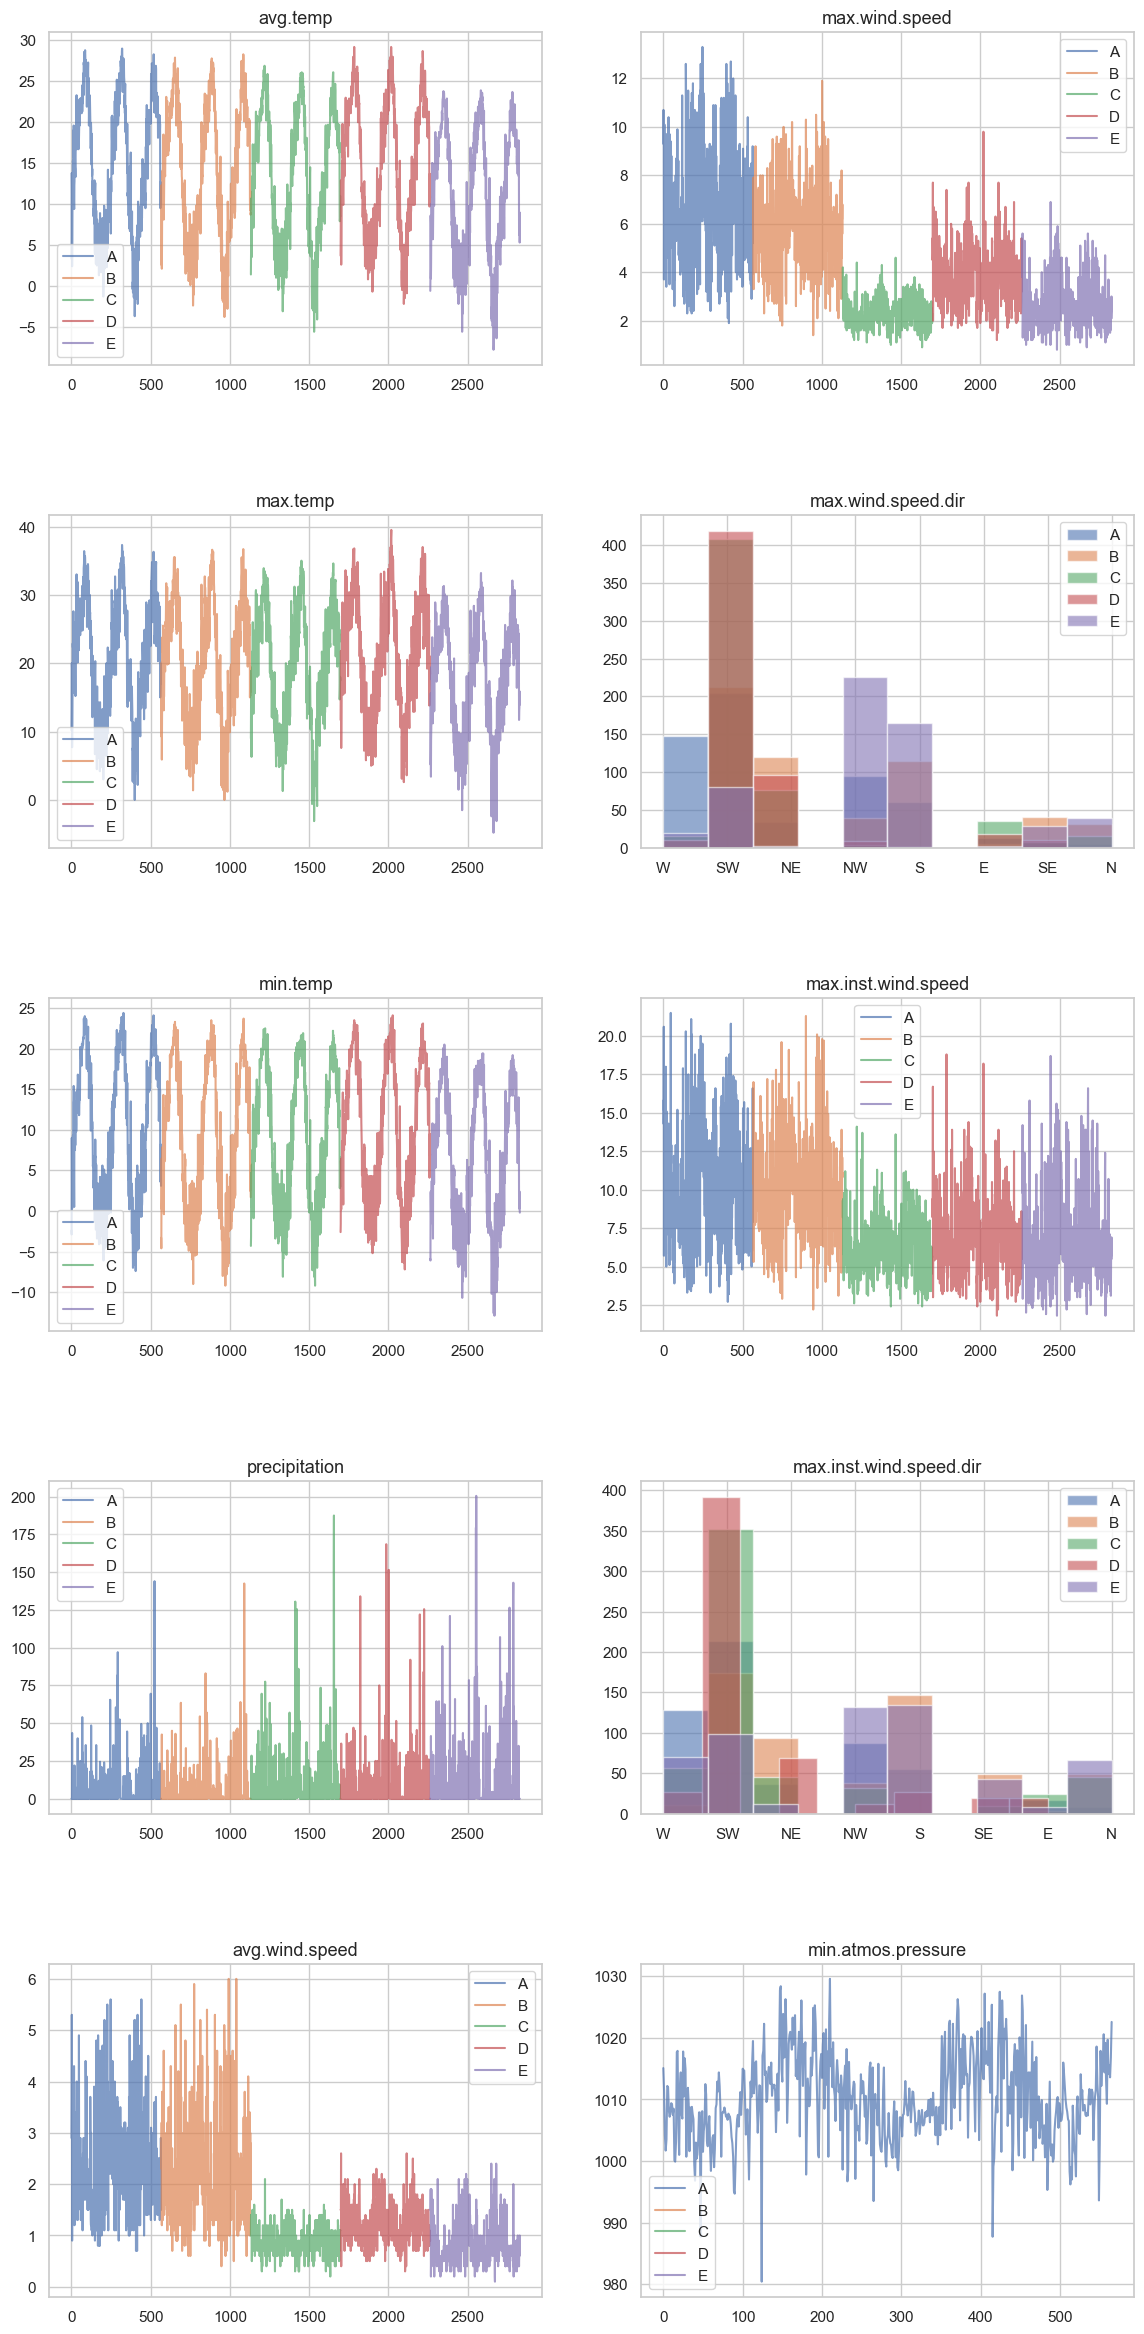

In [11]:
fig, axes = plt.subplots(5,2,figsize=(14, 30), dpi=100)

for i, col_name in enumerate(train_all_lvls.columns[2:]):
    if train_all_lvls[col_name].dtype == 'O':
        train_all_lvls.groupby('region')[col_name].hist(ax=axes[i%5][i//5], alpha=0.6);
        axes[i%5][i//5].legend(["A", "B", "C", "D", "E"]);
    else:
        train_all_lvls.groupby('region')[col_name].plot(ax=axes[i%5][i//5], alpha=0.7);
        axes[i%5][i//5].legend();
    axes[i%5][i//5].set_title(f'{col_name}', fontsize=13);
    plt.subplots_adjust(hspace=0.45)

<h1>Data Cleaning and preparation

<h3>showcasing missing values

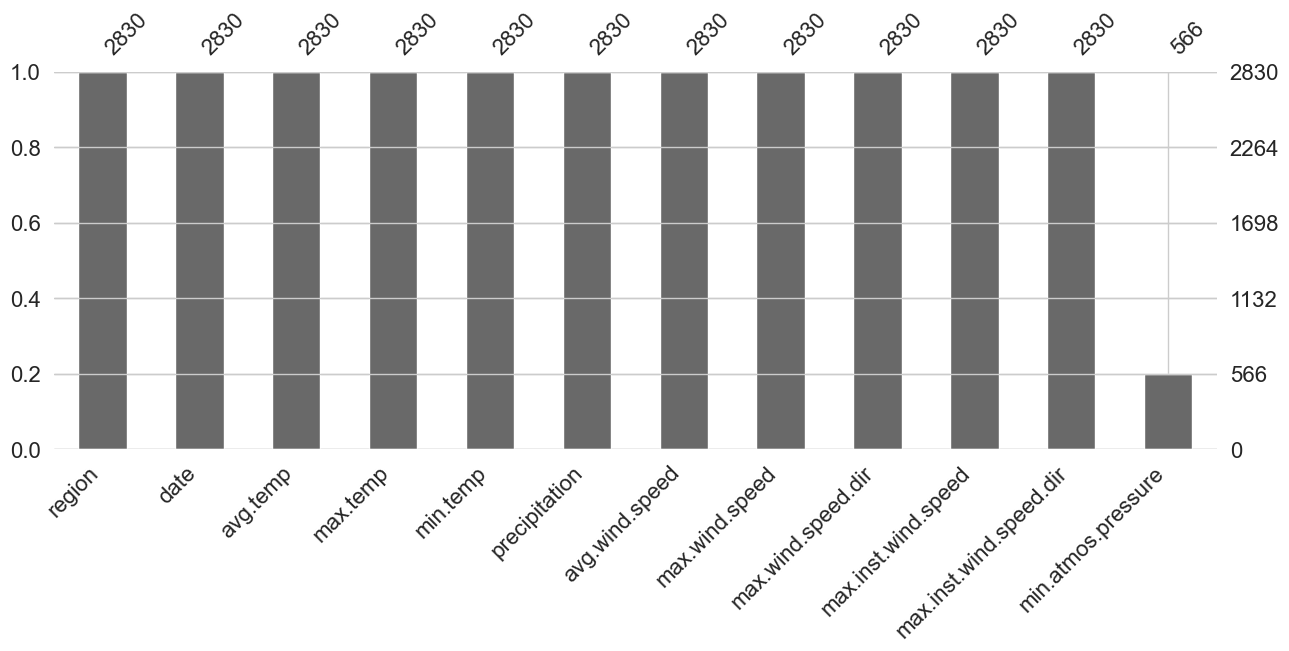

In [12]:
import missingno as msno
msno.bar(train_all_lvls,figsize=(15,5),labels=True)

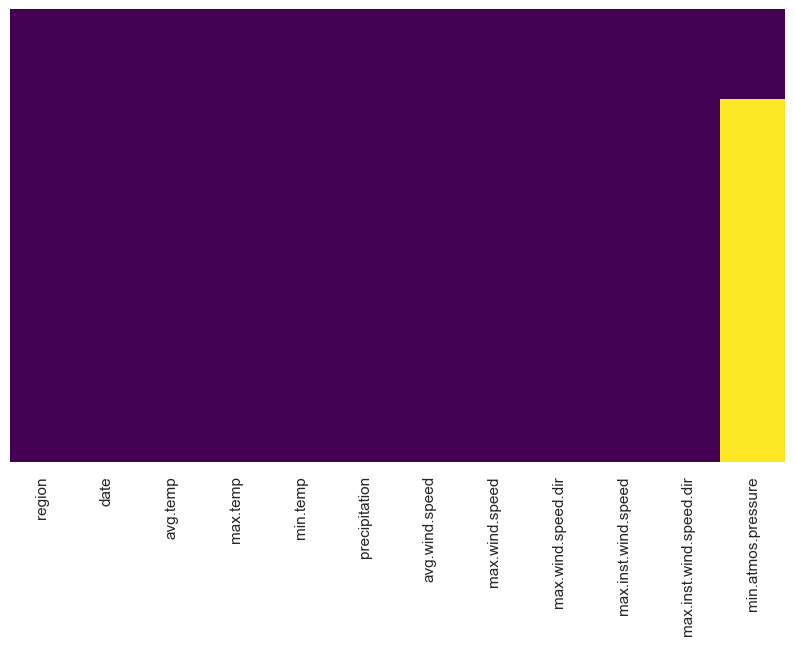

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_all_lvls.isnull(), yticklabels=False, cmap='viridis', cbar=False)

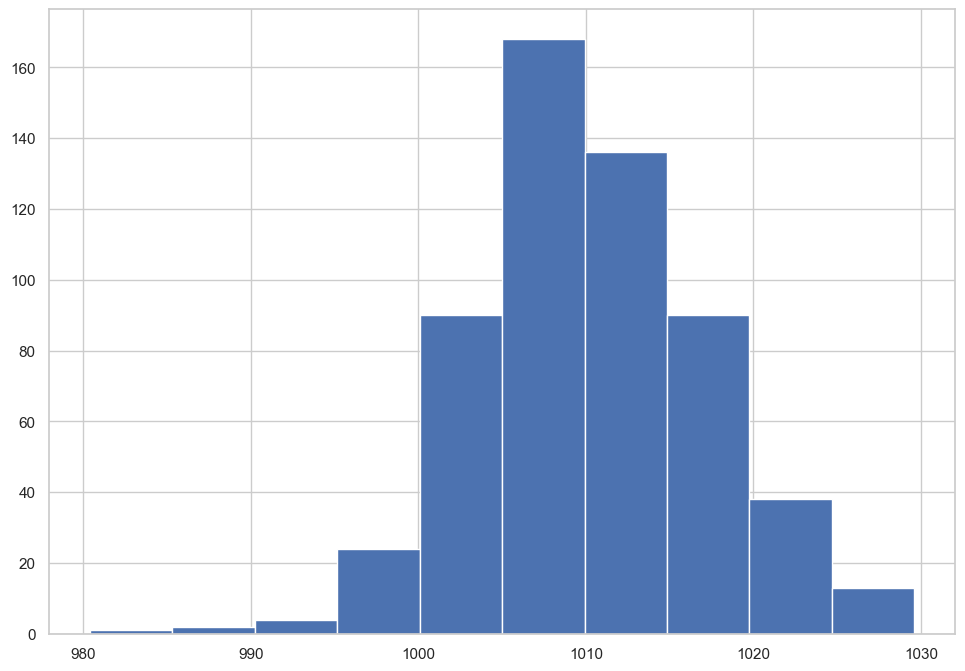

In [14]:
train_all_lvls['min.atmos.pressure'].hist();

<h3>Since the distribution is normal we'll replace the missing values by the mean 

In [15]:
mean_atmos = train_all_lvls['min.atmos.pressure'].mean()
train_all_lvls.fillna(mean_atmos, inplace=True)

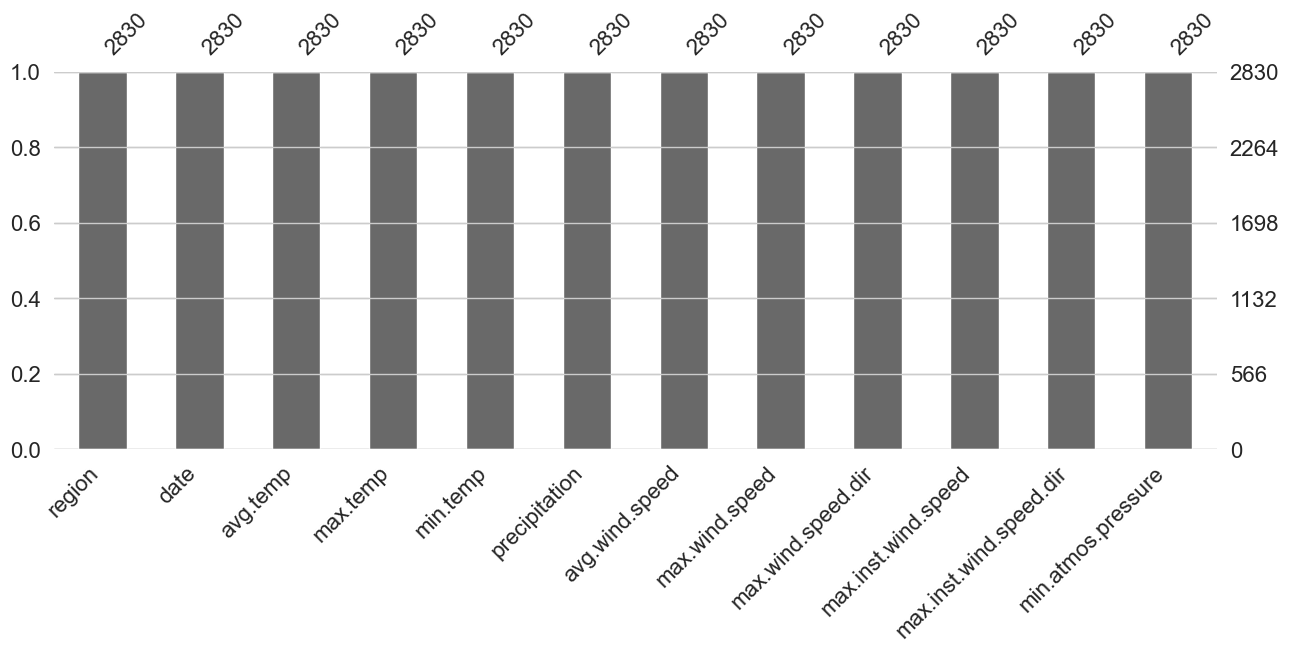

In [16]:
msno.bar(train_all_lvls,figsize=(15,5),labels=True)

In [63]:
train_all_lvls.head()

,region,date,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.wind.speed.dir,max.inst.wind.speed,max.inst.wind.speed.dir,min.atmos.pressure,label,avg_beaufort_scale,max_beaufort_scale
0,A,229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,7,14.3,7,1015.100000,2,4,8
1,B,229b70a3,2.6,9.3,-3.3,0.0,2.8,6.3,3,11.4,3,1010.216254,2,3,6
2,C,229b70a3,1.4,9.0,-4.3,0.0,1.0,2.9,6,8.2,1,1010.216254,2,2,4
3,D,229b70a3,3.7,11.7,-2.6,0.0,1.5,5.4,6,9.4,4,1010.216254,2,2,5
4,E,229b70a3,-0.6,5.2,-5.9,0.0,1.5,3.8,3,9.8,7,1010.216254,2,2,4


In [254]:
#exporting data to be visualised in PowerBI
train_all_lvls.to_csv(r'ALL_TRAIN_DATA.csv', index=False)

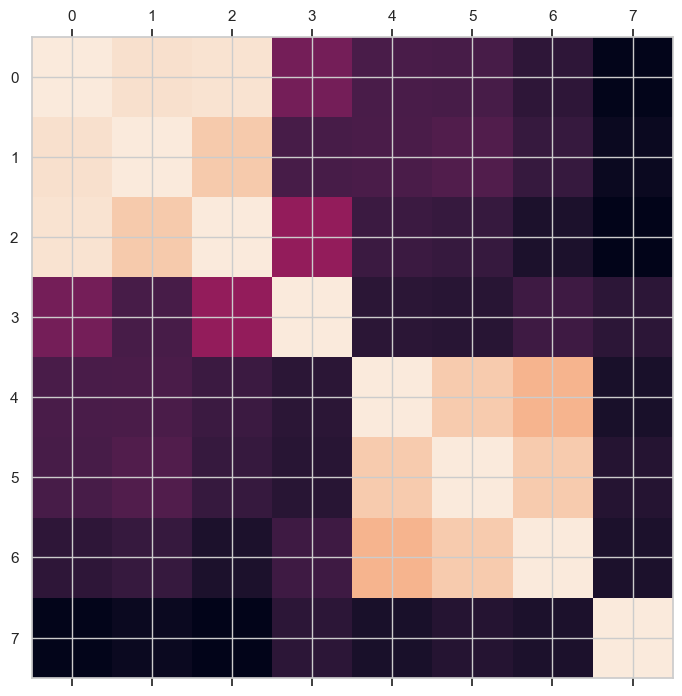

In [17]:
#plotting correlation between features
plt.matshow(train_all_lvls.corr())

Here we'll add the labels table as this is the feature to predict

In [18]:
train_all_lvls = train_all_lvls.merge(labels_df, on="date")


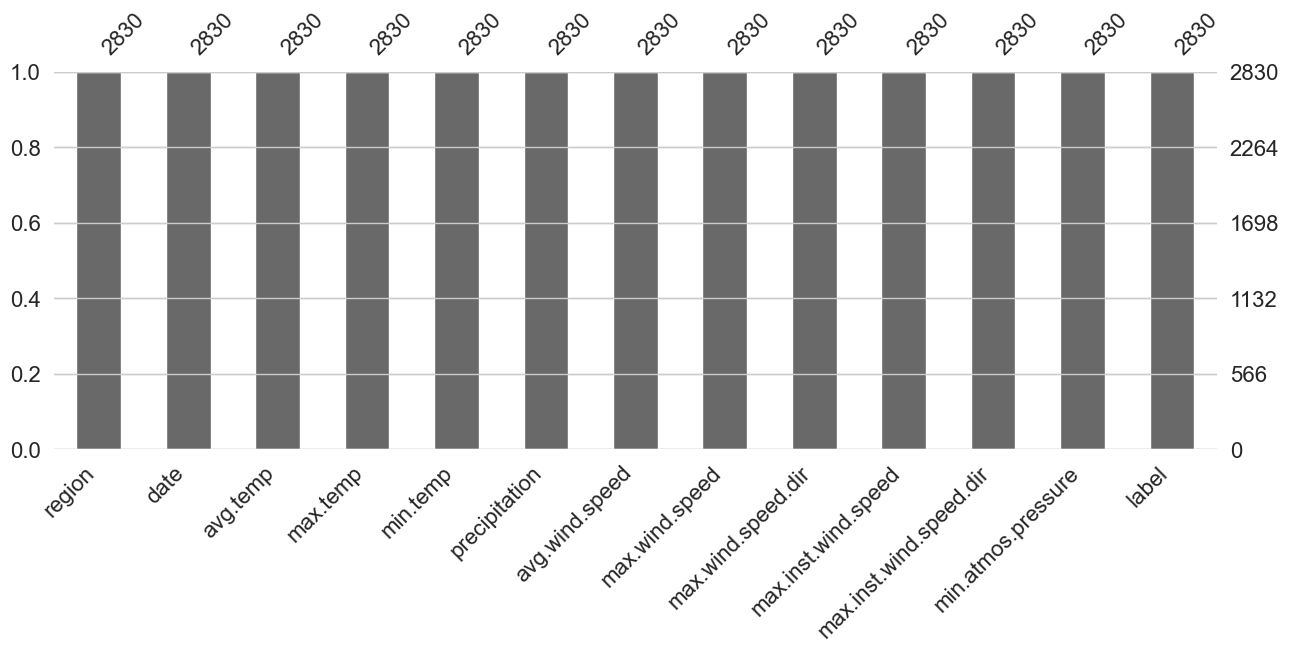

In [19]:
msno.bar(train_all_lvls,figsize=(15,5),labels=True)

<h3> Categorical features 

In [20]:
train_all_lvls.select_dtypes('object').columns

Index(['region', 'date', 'max.wind.speed.dir', 'max.inst.wind.speed.dir',
       'label'],
      dtype='object')

In [21]:
le = LabelEncoder()
le.fit(train_all_lvls['label'])
le_name_map = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_map

{'H': 0, 'L': 1, 'N': 2}

<h3> 
    - Here we'll add a new feature wich will be based on the Beaufort scale which will group different wind speeds, And Encode all categorical features
</h3>

In [22]:
BEAUFORT = [
    (0, 0, 0.3),
    (1, 0.3, 1.6),
    (2, 1.6, 3.4),
    (3, 3.4, 5.5),
    (4, 5.5, 8),
    (5, 8, 10.8),
    (6, 10.8, 13.9),
    (7, 13.9, 17.2),
    (8, 17.2, 20.8),
    (9, 20.8, 24.5),
    (10, 24.5, 28.5),
    (11, 28.5, 33),
    (12, 33, 200),
]


def feature_eng(df):
    le = LabelEncoder()
    
    cat_cols = df.select_dtypes("object").columns[2:]

    for col in cat_cols:
        if df[col].dtype == "object":
            df[col] = le.fit_transform(df[col])

    # wind speed is in meter/second 

    for item in BEAUFORT:
        df.loc[
            (df["avg.wind.speed"]  >= item[1]) & (df["avg.wind.speed"] < item[2]),
            "avg_beaufort_scale",
        ] = item[0]
        df.loc[
            (df["max.wind.speed"] >= item[1]) & (df["max.wind.speed"]  < item[2]),
            "max_beaufort_scale",
        ] = item[0]

    df['avg_beaufort_scale'] = df['avg_beaufort_scale'].astype(int)
    df['max_beaufort_scale'] = df['max_beaufort_scale'].astype(int)

    return df

In [23]:
train = feature_eng(train_all_lvls)


In [24]:
max=0
for i in train['max_beaufort_scale']:
    if i>max : max = i
max

10

<h3>Since the maximum value "max_beaufort_scale" is one we'll not add the T_scale or TORRO scale since it takes into consideration extreme wind speeds and futher details the beaufort scale > 12

In [25]:
train = train.pivot_table(index=["date", "label"], columns="region")
train = pd.DataFrame(train.to_records())
train.head()

,date,label,"('avg.temp', 'A')","('avg.temp', 'B')","('avg.temp', 'C')","('avg.temp', 'D')","('avg.temp', 'E')","('avg.wind.speed', 'A')","('avg.wind.speed', 'B')","('avg.wind.speed', 'C')",...,"('min.temp', 'A')","('min.temp', 'B')","('min.temp', 'C')","('min.temp', 'D')","('min.temp', 'E')","('precipitation', 'A')","('precipitation', 'B')","('precipitation', 'C')","('precipitation', 'D')","('precipitation', 'E')"
0,00173aec,2,18.7,17.6,16.9,19.5,14.3,1.6,1.8,0.9,...,14.9,12.5,12.9,16.4,9.0,1.0,1.5,1.5,0.0,4.5
1,0083f291,1,13.1,12.6,12.0,13.0,10.7,1.4,1.0,0.7,...,11.3,11.1,10.6,12.1,8.5,50.0,46.5,49.0,45.5,63.0
2,014cfe7b,2,19.9,19.0,17.5,19.9,16.2,3.7,3.6,0.7,...,16.1,13.5,15.8,16.3,12.4,18.0,17.0,63.5,19.0,32.0
3,01947c8e,2,21.6,20.2,20.5,21.3,17.6,1.6,1.2,1.1,...,15.8,14.2,15.5,15.9,11.5,0.0,1.0,0.0,0.0,0.0
4,0258884d,2,15.2,13.9,13.9,15.8,11.1,2.5,2.3,1.2,...,10.3,5.6,8.9,10.4,5.3,0.0,0.0,0.0,0.0,0.0


<h3>Here we'll reformat the column names

In [26]:
def replace_all(text):
    d = { "('": "", "', '": "_", "')" : "",}
    for i, j in d.items():
        text = text.replace(i, j)
    return text

# ('avg.temp', 'A') -> avg.temp_A

In [27]:
train.columns = list(map(replace_all, train.columns))

In [28]:
train

,date,label,avg.temp_A,avg.temp_B,avg.temp_C,avg.temp_D,avg.temp_E,avg.wind.speed_A,avg.wind.speed_B,avg.wind.speed_C,...,min.temp_A,min.temp_B,min.temp_C,min.temp_D,min.temp_E,precipitation_A,precipitation_B,precipitation_C,precipitation_D,precipitation_E
0,00173aec,2,18.7,17.6,16.9,19.5,14.3,1.6,1.8,0.9,...,14.9,12.5,12.9,16.4,9.0,1.0,1.5,1.5,0.0,4.5
1,0083f291,1,13.1,12.6,12.0,13.0,10.7,1.4,1.0,0.7,...,11.3,11.1,10.6,12.1,8.5,50.0,46.5,49.0,45.5,63.0
2,014cfe7b,2,19.9,19.0,17.5,19.9,16.2,3.7,3.6,0.7,...,16.1,13.5,15.8,16.3,12.4,18.0,17.0,63.5,19.0,32.0
3,01947c8e,2,21.6,20.2,20.5,21.3,17.6,1.6,1.2,1.1,...,15.8,14.2,15.5,15.9,11.5,0.0,1.0,0.0,0.0,0.0
4,0258884d,2,15.2,13.9,13.9,15.8,11.1,2.5,2.3,1.2,...,10.3,5.6,8.9,10.4,5.3,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,fe2a1385,1,2.9,1.6,1.4,3.4,0.4,1.2,0.9,0.7,...,-4.0,-5.9,-2.8,-3.4,-5.9,0.0,0.0,0.0,0.0,0.0
562,fe6dd99c,1,2.9,2.9,3.9,2.9,0.2,1.6,3.9,1.0,...,1.7,1.4,1.9,1.0,-1.2,2.0,1.0,2.0,4.0,8.0
563,ff88c3dd,1,9.8,8.9,9.0,10.2,6.3,1.9,1.5,1.4,...,1.5,-0.1,2.0,2.5,-1.9,0.0,0.0,0.0,0.0,0.0
564,ff929090,2,10.4,8.1,7.1,11.0,5.7,4.3,4.6,0.9,...,3.4,1.5,-0.6,3.2,-1.6,0.0,3.5,5.5,0.0,1.5


<h3> Splitting the dataframe into features and label

In [29]:
X, y = train.drop(["label", "date"], axis=1), train[["label"]].values.flatten()

In [30]:
X

,avg.temp_A,avg.temp_B,avg.temp_C,avg.temp_D,avg.temp_E,avg.wind.speed_A,avg.wind.speed_B,avg.wind.speed_C,avg.wind.speed_D,avg.wind.speed_E,...,min.temp_A,min.temp_B,min.temp_C,min.temp_D,min.temp_E,precipitation_A,precipitation_B,precipitation_C,precipitation_D,precipitation_E
0,18.7,17.6,16.9,19.5,14.3,1.6,1.8,0.9,1.2,0.5,...,14.9,12.5,12.9,16.4,9.0,1.0,1.5,1.5,0.0,4.5
1,13.1,12.6,12.0,13.0,10.7,1.4,1.0,0.7,0.7,0.6,...,11.3,11.1,10.6,12.1,8.5,50.0,46.5,49.0,45.5,63.0
2,19.9,19.0,17.5,19.9,16.2,3.7,3.6,0.7,1.3,1.1,...,16.1,13.5,15.8,16.3,12.4,18.0,17.0,63.5,19.0,32.0
3,21.6,20.2,20.5,21.3,17.6,1.6,1.2,1.1,1.0,0.6,...,15.8,14.2,15.5,15.9,11.5,0.0,1.0,0.0,0.0,0.0
4,15.2,13.9,13.9,15.8,11.1,2.5,2.3,1.2,1.8,0.7,...,10.3,5.6,8.9,10.4,5.3,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2.9,1.6,1.4,3.4,0.4,1.2,0.9,0.7,0.9,0.7,...,-4.0,-5.9,-2.8,-3.4,-5.9,0.0,0.0,0.0,0.0,0.0
562,2.9,2.9,3.9,2.9,0.2,1.6,3.9,1.0,0.7,0.3,...,1.7,1.4,1.9,1.0,-1.2,2.0,1.0,2.0,4.0,8.0
563,9.8,8.9,9.0,10.2,6.3,1.9,1.5,1.4,1.5,0.9,...,1.5,-0.1,2.0,2.5,-1.9,0.0,0.0,0.0,0.0,0.0
564,10.4,8.1,7.1,11.0,5.7,4.3,4.6,0.9,2.0,1.7,...,3.4,1.5,-0.6,3.2,-1.6,0.0,3.5,5.5,0.0,1.5


In [31]:
y

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,

<h1> Feature Selection 

In [32]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
import lightgbm as lgb

In [34]:
# Extract categoricals and their indices
cat_feats = X.select_dtypes(include=['int64']).columns.to_list()


In [35]:
cat_feats

[]

In [36]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=0)

In [37]:
clf1 = lgb.LGBMClassifier()
clf1.fit(X_train, y_train)

LGBMClassifier()

In [38]:
y_pred=clf1.predict(X_eval.values)

In [39]:
y_pred

array([2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 1])

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_eval,y_pred))
print(classification_report(y_eval,y_pred))

[[ 3  4  2]
 [ 1 14 24]
 [ 2 16 76]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.41      0.36      0.38        39
           2       0.75      0.81      0.78        94

    accuracy                           0.65       142
   macro avg       0.55      0.50      0.52       142
weighted avg       0.64      0.65      0.64       142



<h3>Plotting feature importance

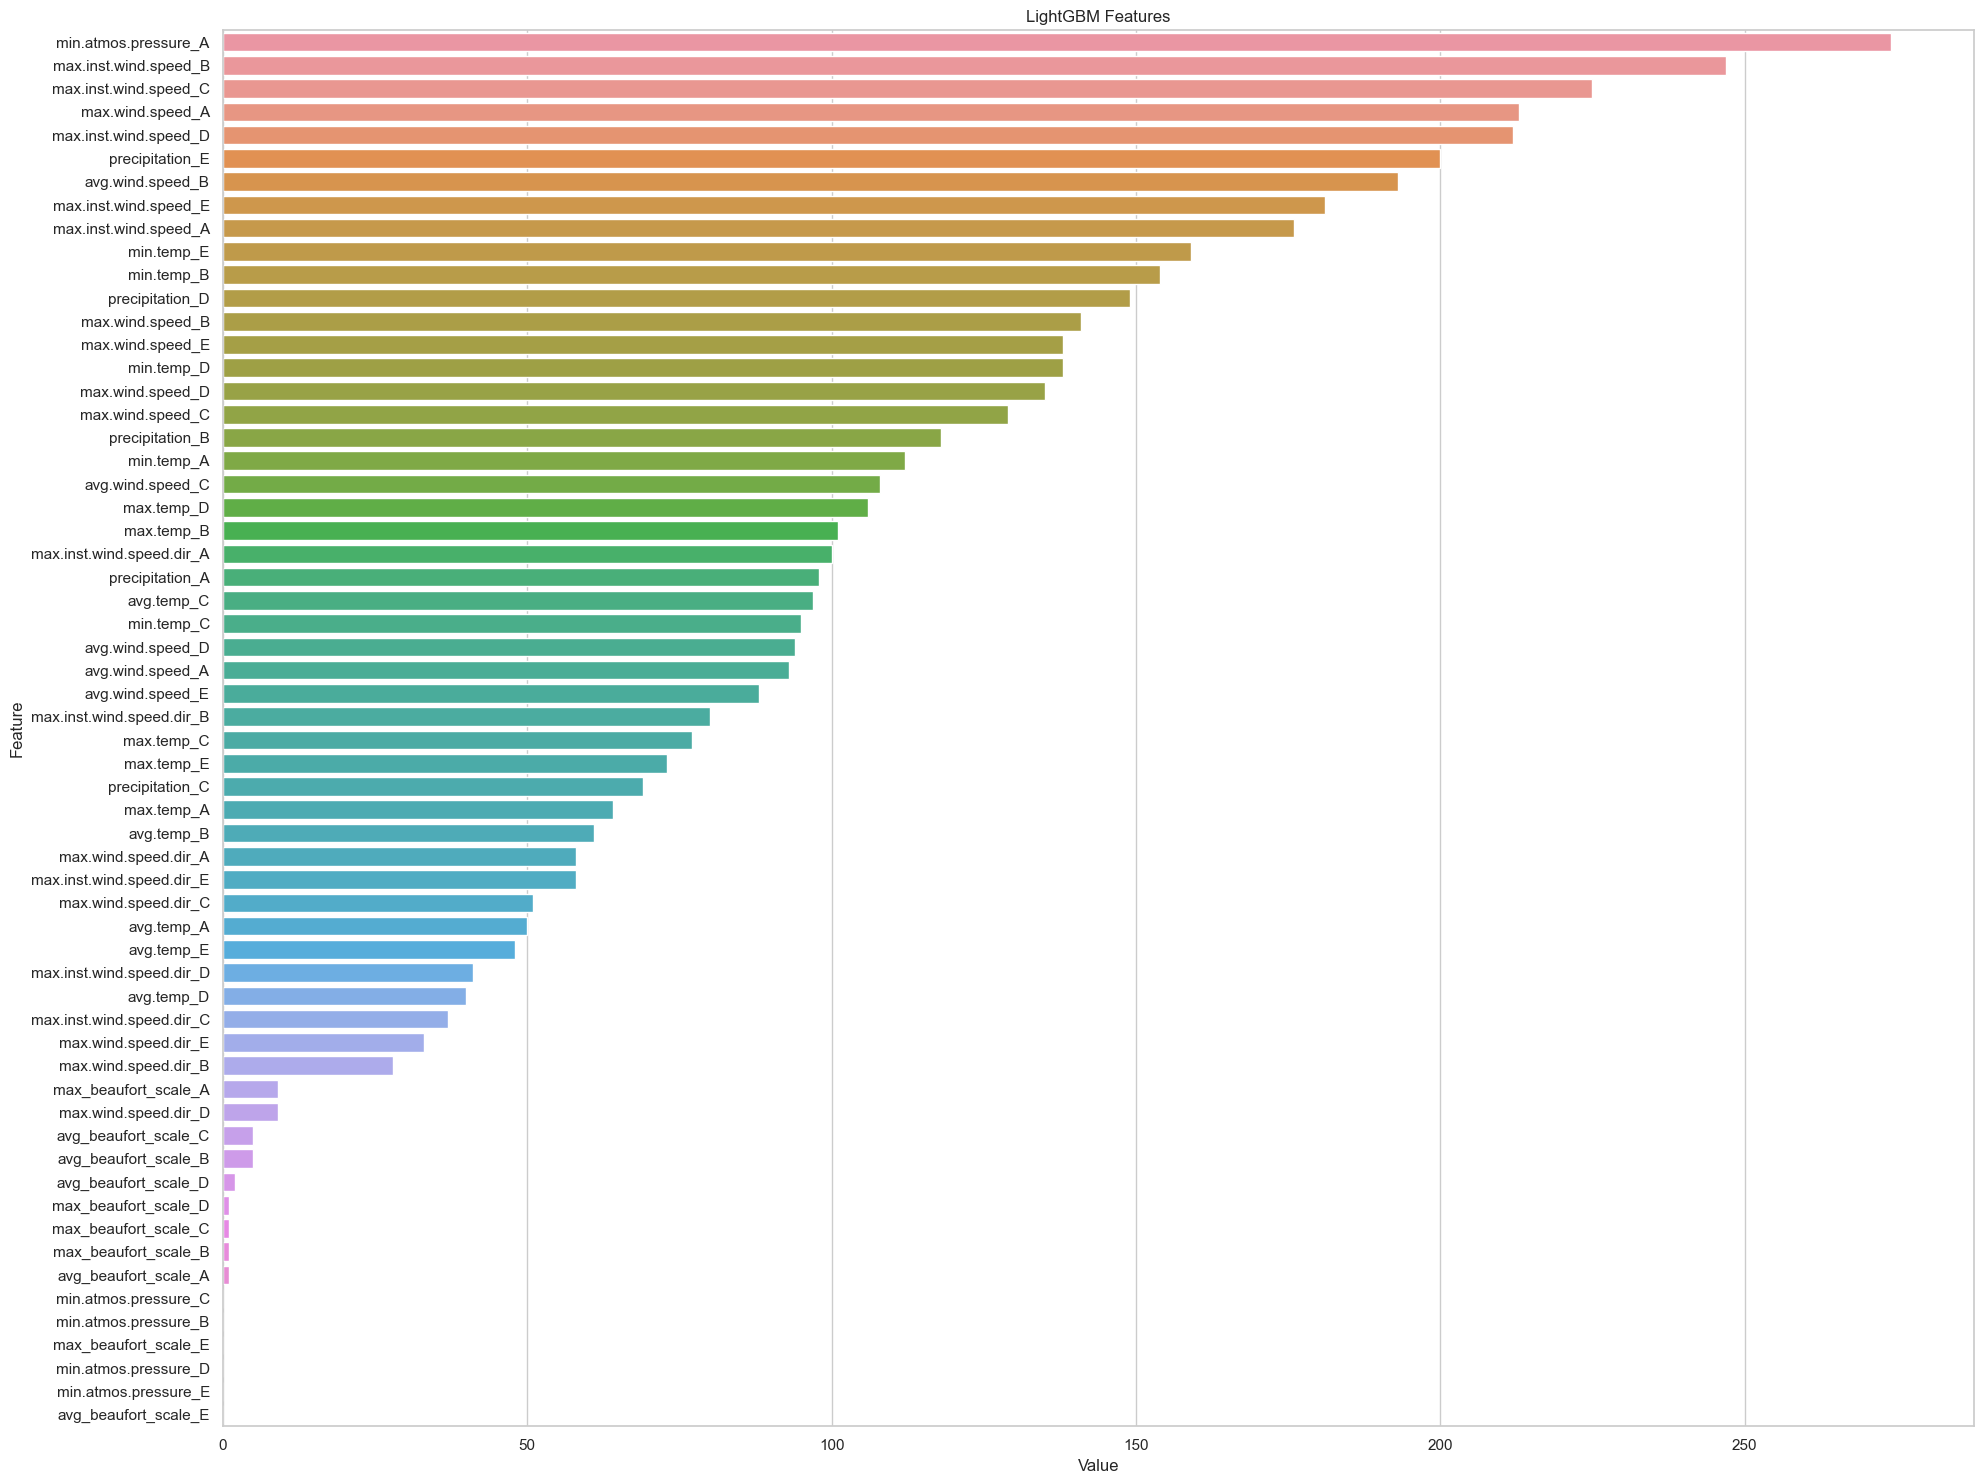

In [41]:
feature_imp = pd.DataFrame(sorted(zip(clf1.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RFC = RandomForestClassifier().fit(X_train, y_train)

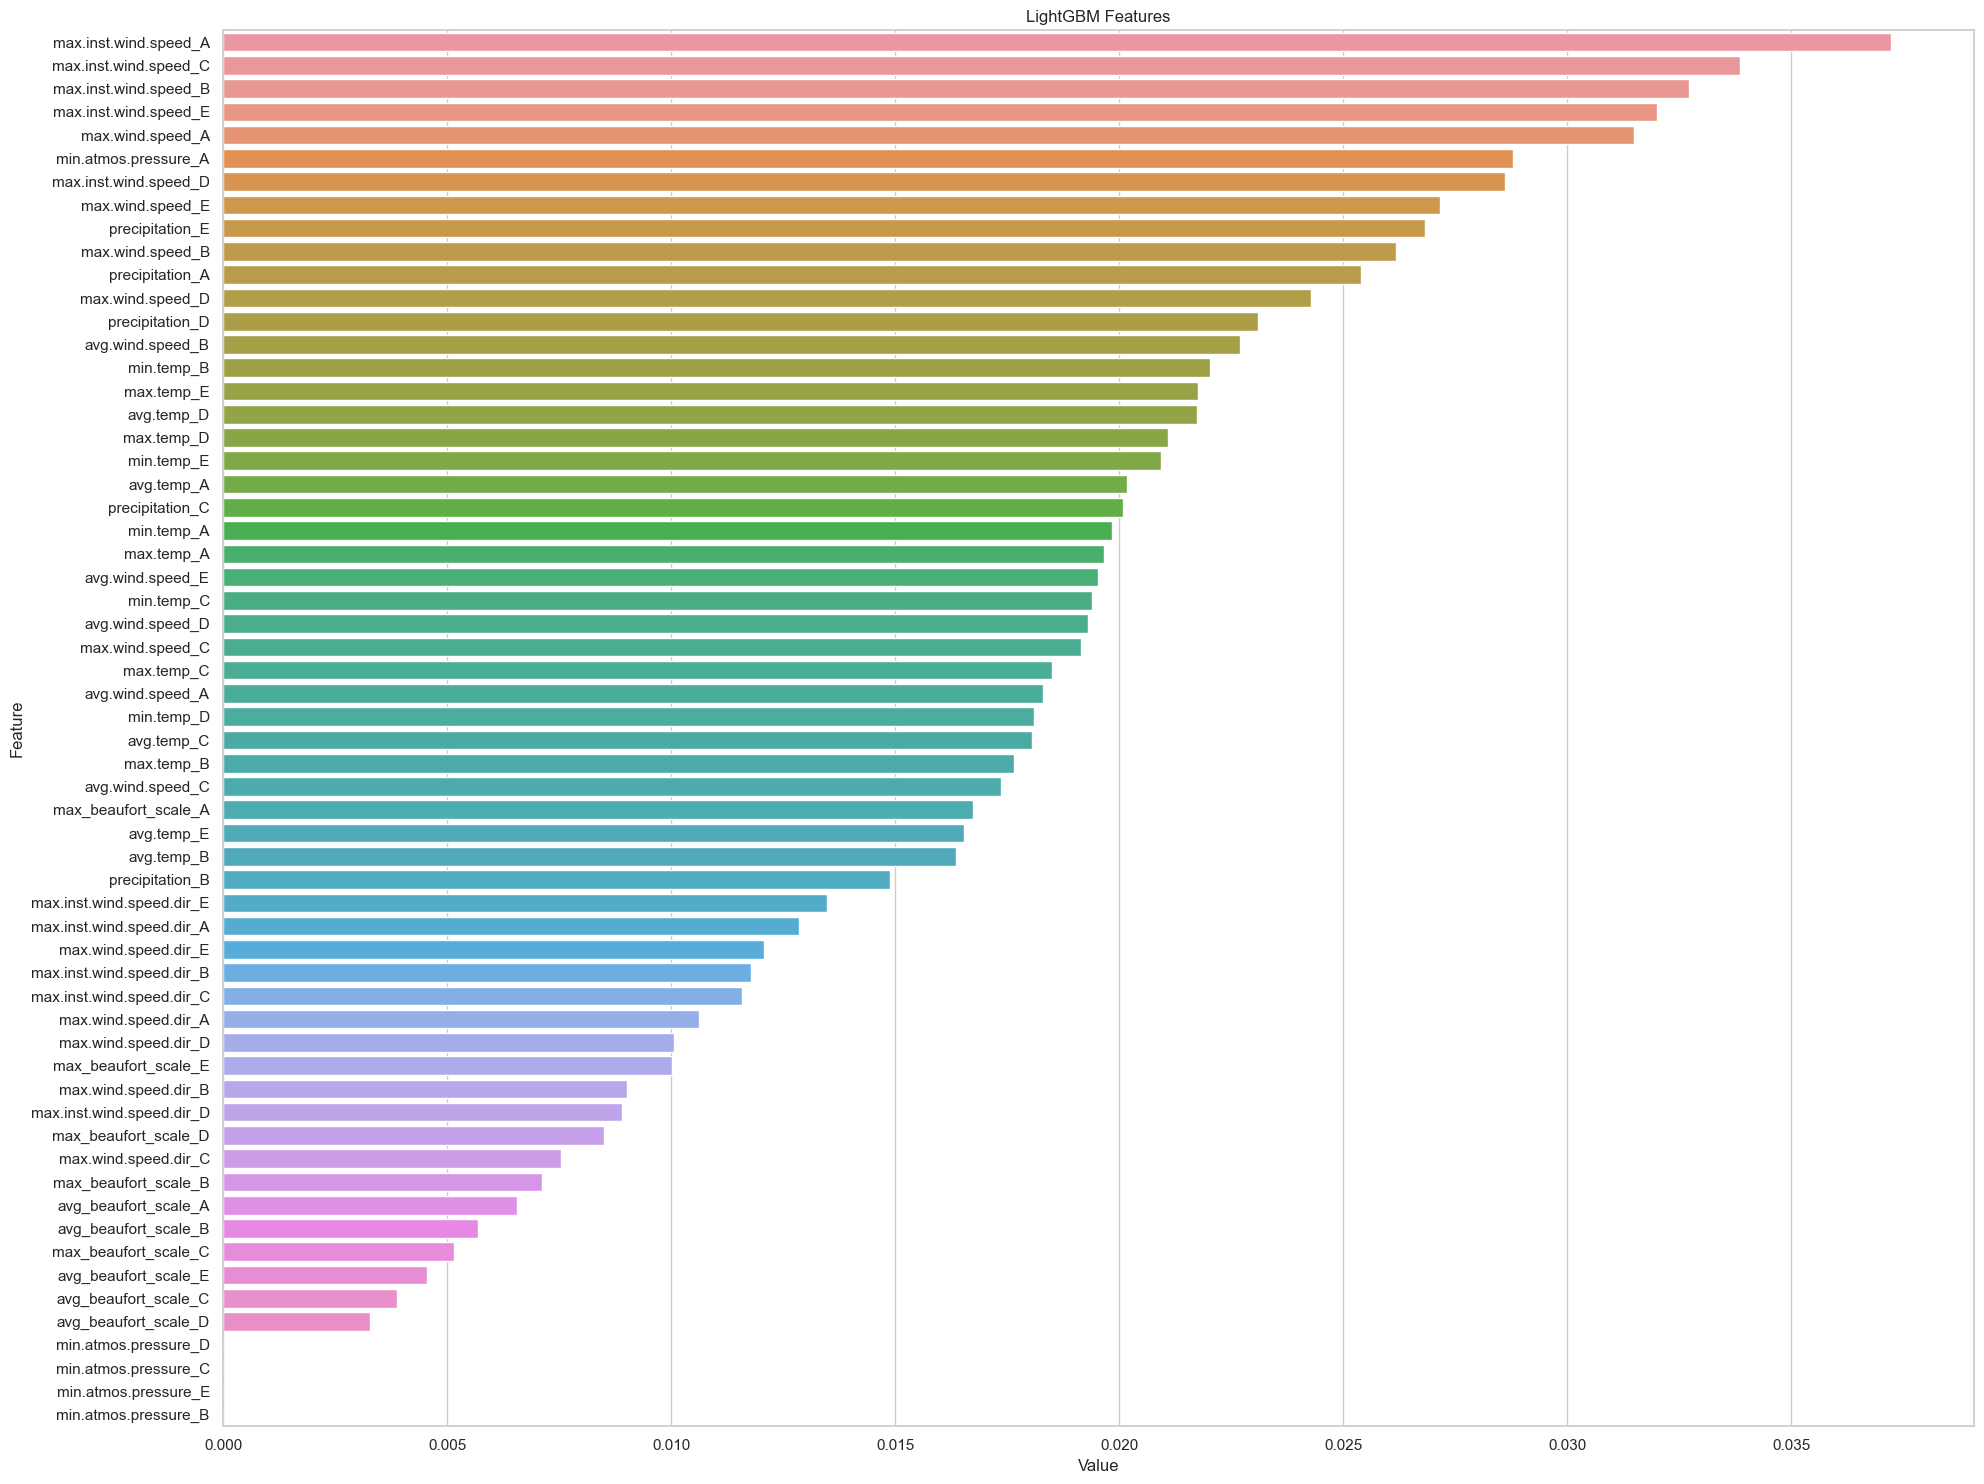

In [60]:
feature_imp = pd.DataFrame(sorted(zip(RFC.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()

<h3> From the two feature importance graphs we can see that the beaufort scale we added isn't that important in making our prediction but we'll choose to leave it since there's another feature that isn't taken into consideration in both models which is atmospheric pressure in regions other than A and this is most likely caused by the mean value we inserted in the missing values

In [79]:
X = train.drop(["label","date","min.atmos.pressure_D", "min.atmos.pressure_C","min.atmos.pressure_B","min.atmos.pressure_E"], axis=1)

<h3>And then create another training and validation sets

In [80]:
X

,avg.temp_A,avg.temp_B,avg.temp_C,avg.temp_D,avg.temp_E,avg.wind.speed_A,avg.wind.speed_B,avg.wind.speed_C,avg.wind.speed_D,avg.wind.speed_E,...,min.temp_A,min.temp_B,min.temp_C,min.temp_D,min.temp_E,precipitation_A,precipitation_B,precipitation_C,precipitation_D,precipitation_E
0,18.7,17.6,16.9,19.5,14.3,1.6,1.8,0.9,1.2,0.5,...,14.9,12.5,12.9,16.4,9.0,1.0,1.5,1.5,0.0,4.5
1,13.1,12.6,12.0,13.0,10.7,1.4,1.0,0.7,0.7,0.6,...,11.3,11.1,10.6,12.1,8.5,50.0,46.5,49.0,45.5,63.0
2,19.9,19.0,17.5,19.9,16.2,3.7,3.6,0.7,1.3,1.1,...,16.1,13.5,15.8,16.3,12.4,18.0,17.0,63.5,19.0,32.0
3,21.6,20.2,20.5,21.3,17.6,1.6,1.2,1.1,1.0,0.6,...,15.8,14.2,15.5,15.9,11.5,0.0,1.0,0.0,0.0,0.0
4,15.2,13.9,13.9,15.8,11.1,2.5,2.3,1.2,1.8,0.7,...,10.3,5.6,8.9,10.4,5.3,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2.9,1.6,1.4,3.4,0.4,1.2,0.9,0.7,0.9,0.7,...,-4.0,-5.9,-2.8,-3.4,-5.9,0.0,0.0,0.0,0.0,0.0
562,2.9,2.9,3.9,2.9,0.2,1.6,3.9,1.0,0.7,0.3,...,1.7,1.4,1.9,1.0,-1.2,2.0,1.0,2.0,4.0,8.0
563,9.8,8.9,9.0,10.2,6.3,1.9,1.5,1.4,1.5,0.9,...,1.5,-0.1,2.0,2.5,-1.9,0.0,0.0,0.0,0.0,0.0
564,10.4,8.1,7.1,11.0,5.7,4.3,4.6,0.9,2.0,1.7,...,3.4,1.5,-0.6,3.2,-1.6,0.0,3.5,5.5,0.0,1.5


In [122]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=0)

In [82]:
clf1 = lgb.LGBMClassifier()
clf1.fit(X_train, y_train)
y_pred=clf1.predict(X_eval.values)

print(confusion_matrix(y_eval,y_pred))
print(classification_report(y_eval,y_pred))

[[ 3  4  2]
 [ 1 14 24]
 [ 2 16 76]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.41      0.36      0.38        39
           2       0.75      0.81      0.78        94

    accuracy                           0.65       142
   macro avg       0.55      0.50      0.52       142
weighted avg       0.64      0.65      0.64       142



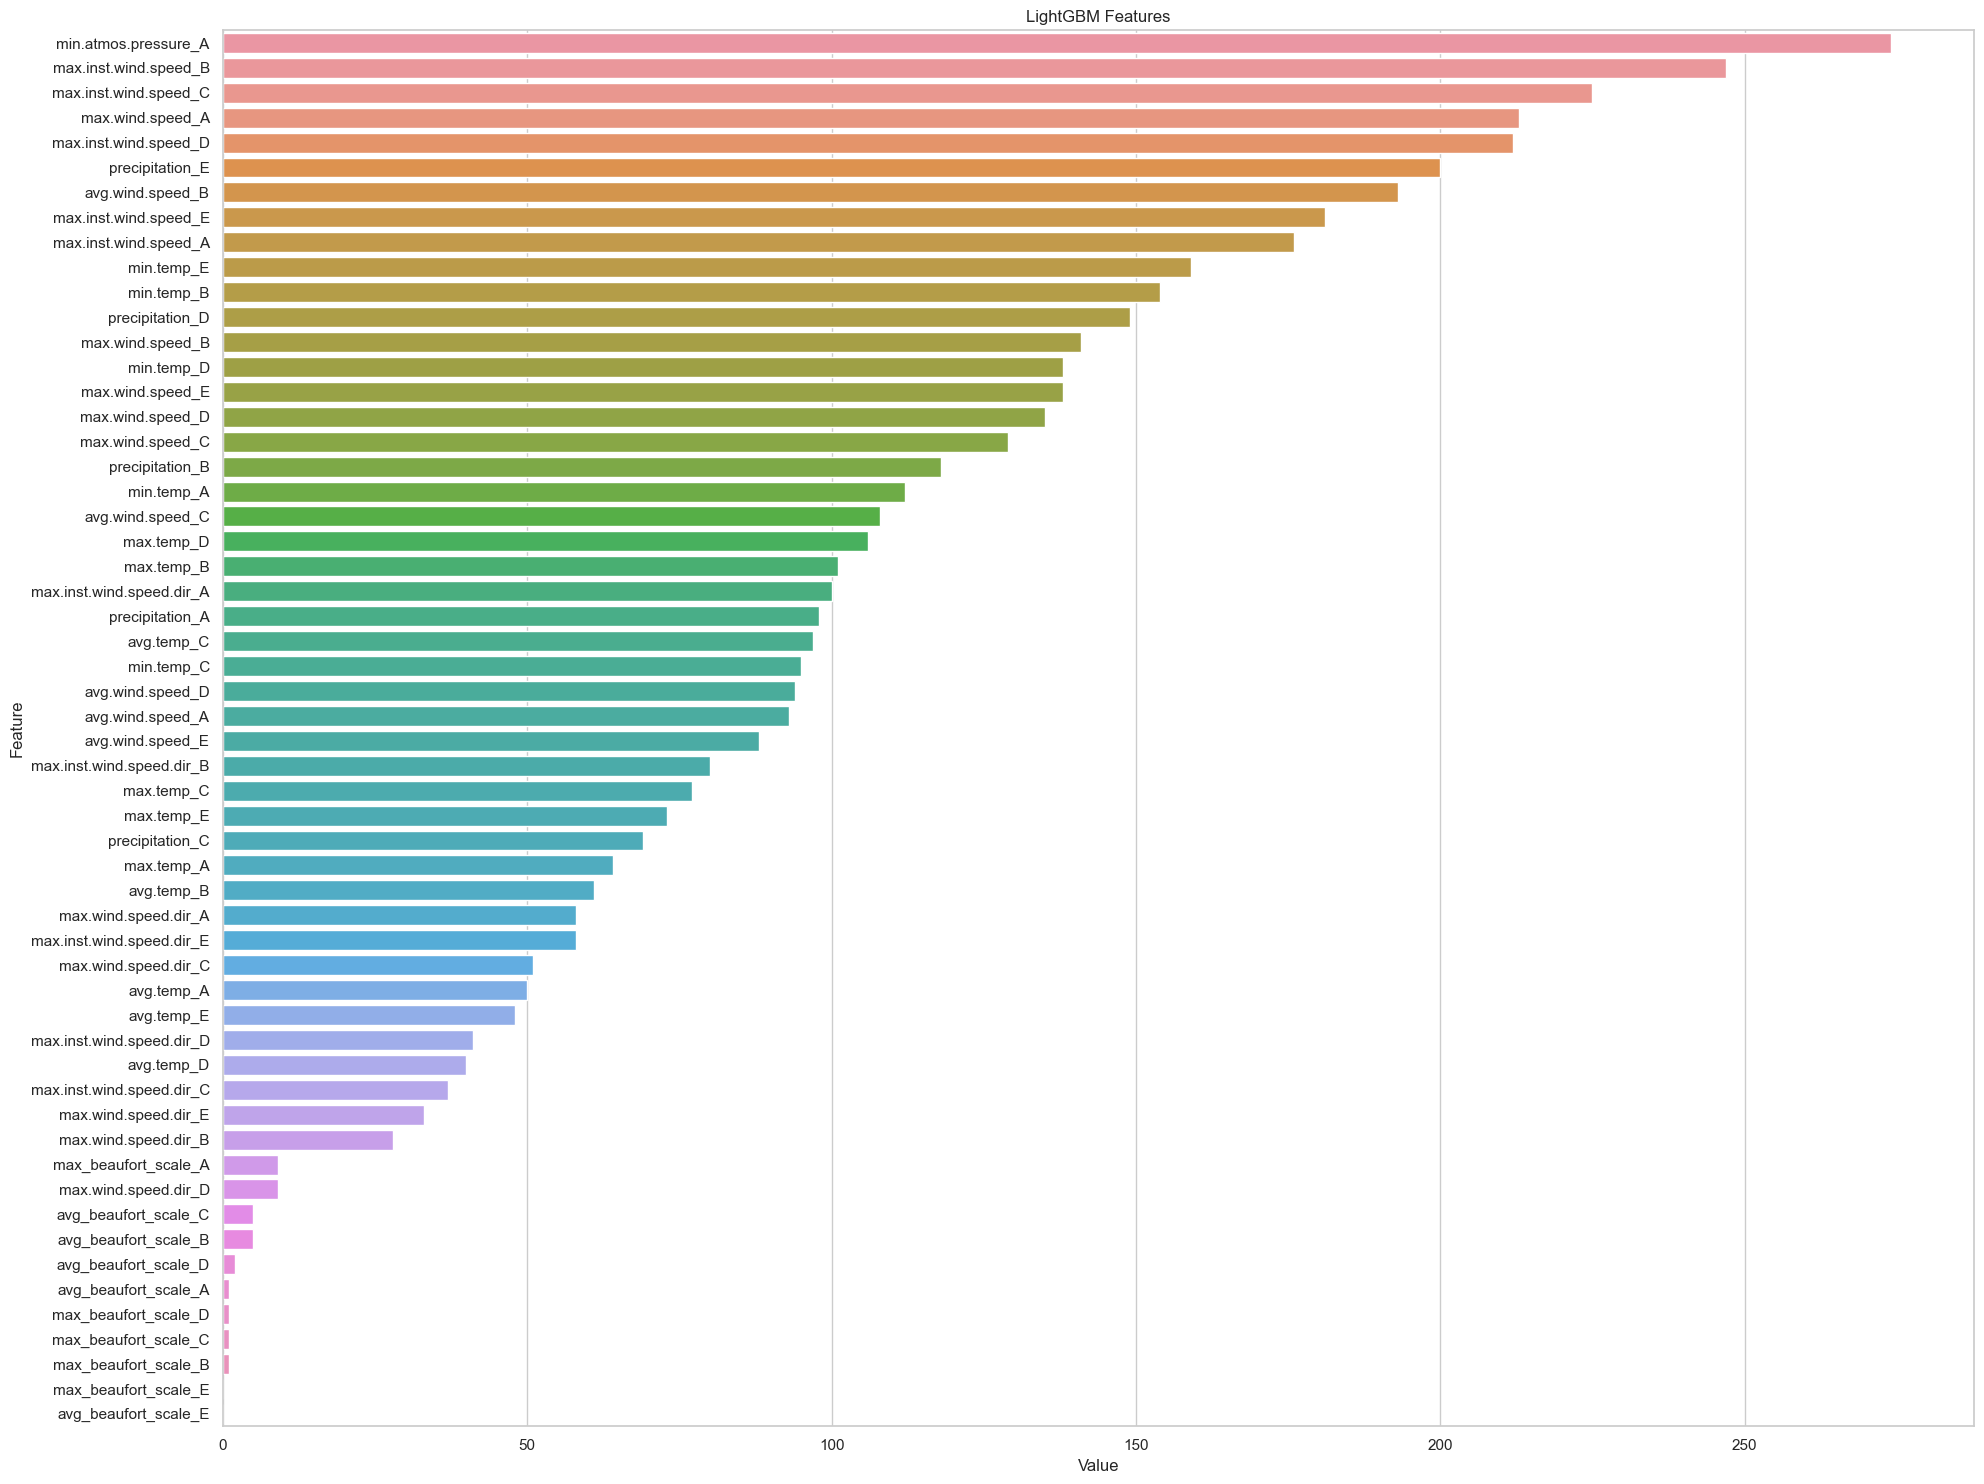

In [83]:
feature_imp = pd.DataFrame(sorted(zip(clf1.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()

In [169]:
RFC = RandomForestClassifier().fit(X_train, y_train)

[[ 2  4  3]
 [ 2  8 29]
 [ 1 13 80]]
              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.32      0.21      0.25        39
           2       0.71      0.85      0.78        94

    accuracy                           0.63       142
   macro avg       0.48      0.43      0.44       142
weighted avg       0.59      0.63      0.60       142



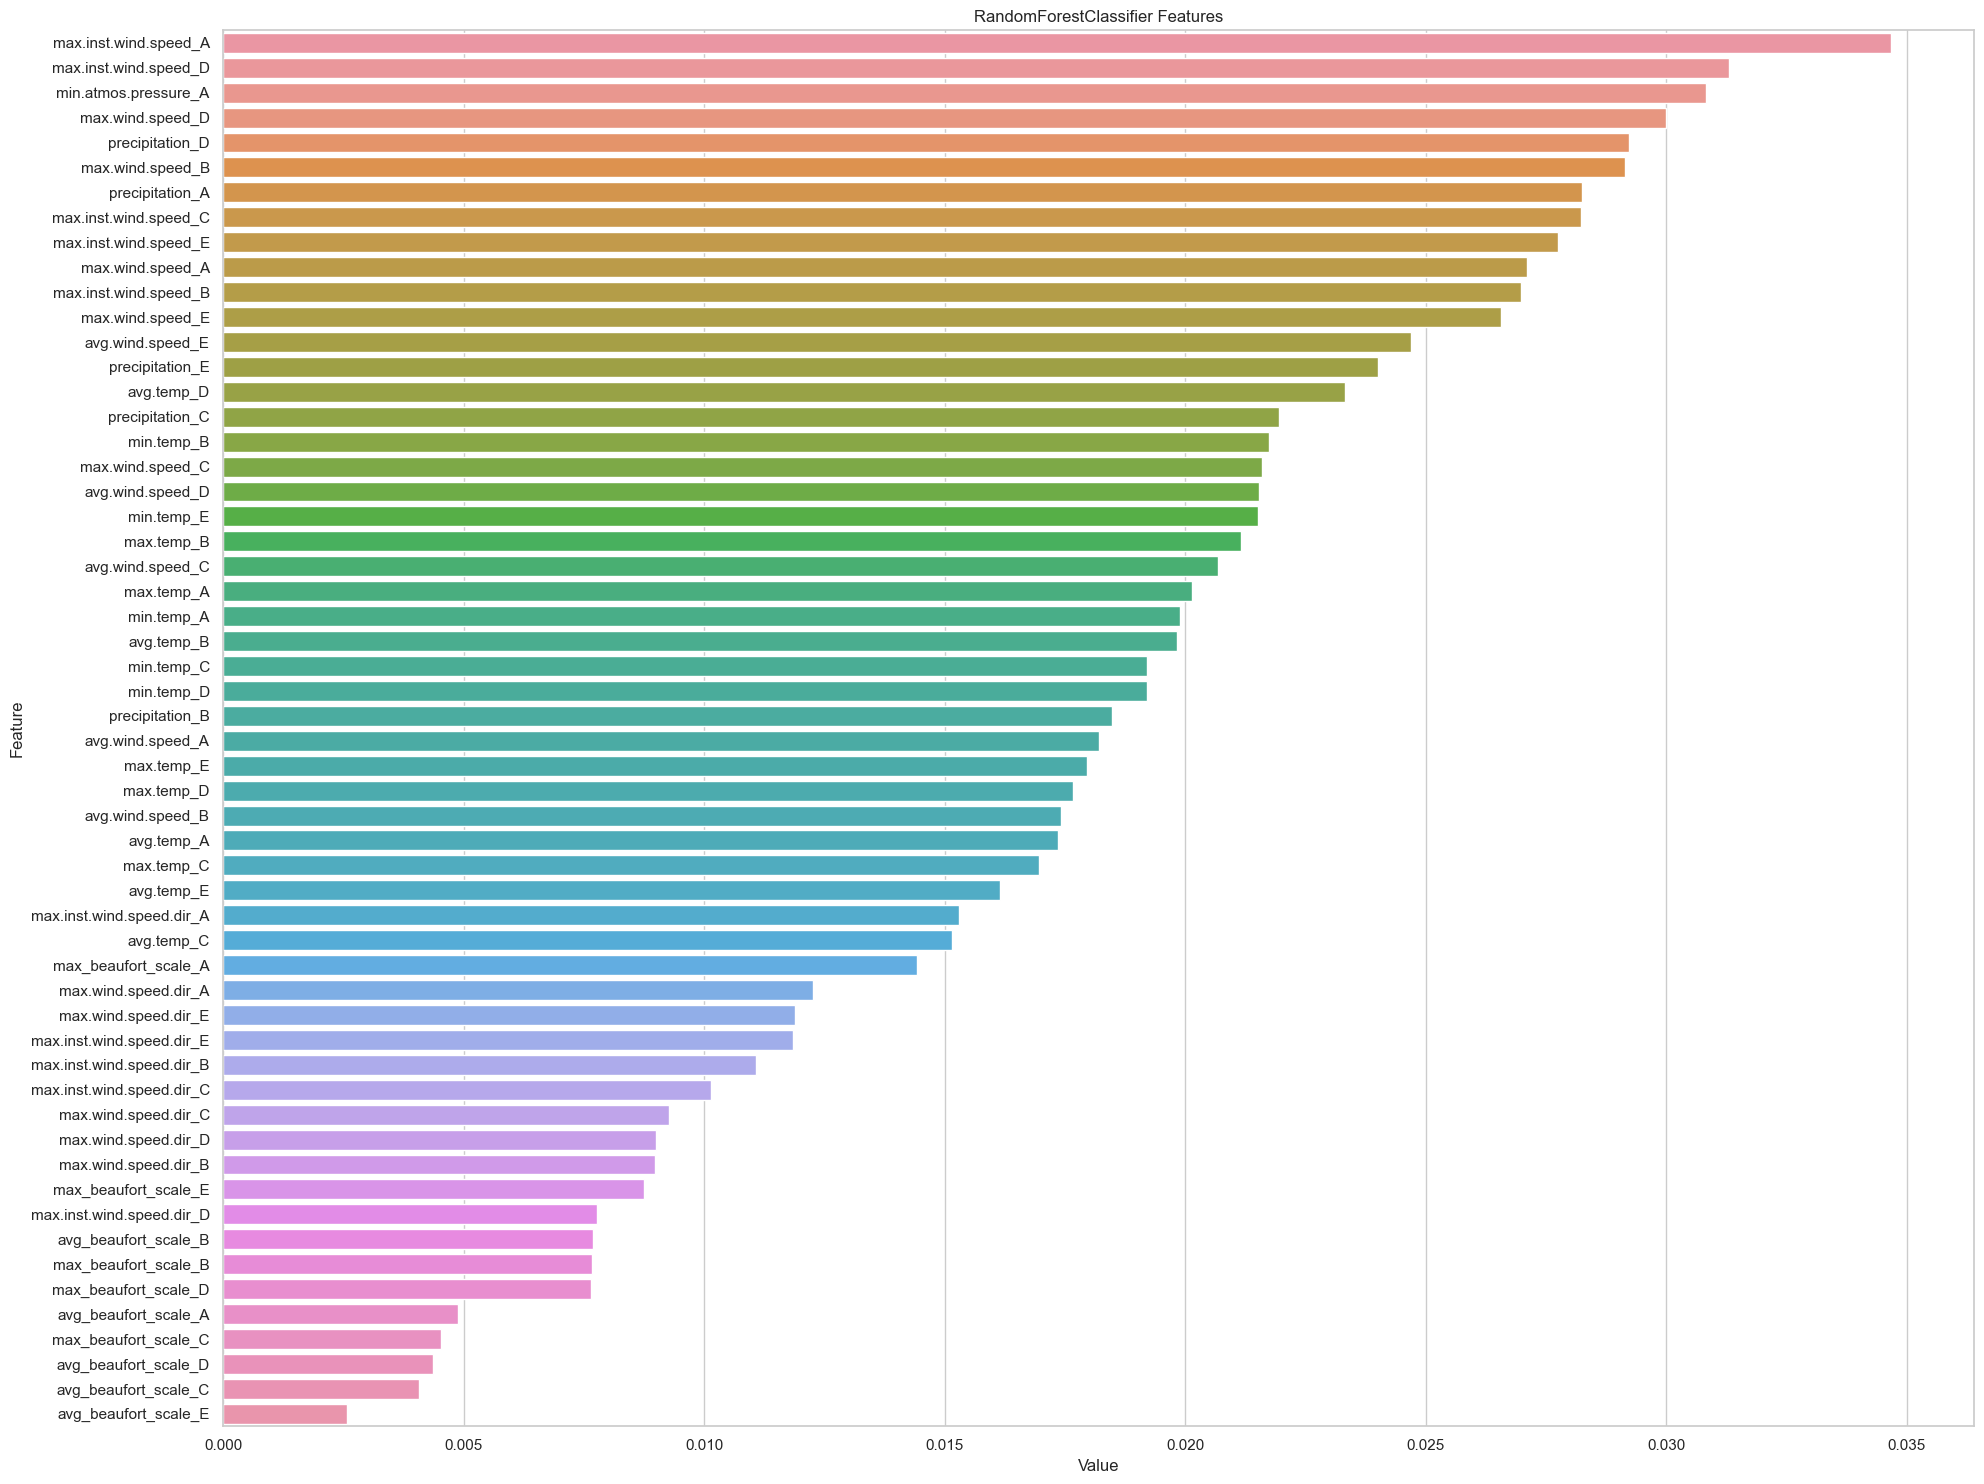

In [203]:

y_pred=RFC.predict(X_eval)
print(confusion_matrix(y_eval,y_pred))
print(classification_report(y_eval,y_pred))
feature_imp = pd.DataFrame(sorted(zip(RFC.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RandomForestClassifier Features')
plt.tight_layout()

<h3> Again from both our feature importance graphs the feature we added doesn't seem that import to our case study, we'll be removing the features remaining after we get 95% of the important features 

<h3> We'll procede by showcasing the cumulative summation of the important features sorted ascendingly

In [204]:
np.cumsum(feature_imp.sort_values(by="Value", ascending=True)['Value'])

0     0.002587
1     0.006662
2     0.011017
3     0.015545
4     0.020432
5     0.028087
6     0.035759
7     0.043456
8     0.051226
9     0.059983
10    0.068969
11    0.077977
12    0.087244
13    0.097395
14    0.108477
15    0.120330
16    0.132210
17    0.144483
18    0.158900
19    0.174050
20    0.189352
21    0.205505
22    0.222470
23    0.239823
24    0.257239
25    0.274899
26    0.292851
27    0.311062
28    0.329536
29    0.348734
30    0.367939
31    0.387765
32    0.407654
33    0.427802
34    0.448489
35    0.469648
36    0.491158
37    0.512696
38    0.534285
39    0.556023
40    0.577967
41    0.601289
42    0.625302
43    0.649991
44    0.676549
45    0.703527
46    0.730626
47    0.758374
48    0.786600
49    0.814847
50    0.843983
51    0.873216
52    0.903212
53    0.934034
54    0.965337
55    1.000000
Name: Value, dtype: float64

<h3>We'll drop the first 10 features since their cumulative importance is 6%

In [205]:
X=X.drop(["avg_beaufort_scale_A", "avg_beaufort_scale_B","avg_beaufort_scale_C","avg_beaufort_scale_D","avg_beaufort_scale_E","max_beaufort_scale_A","max_beaufort_scale_B","max_beaufort_scale_C","max_beaufort_scale_D","max_beaufort_scale_E"], axis=1)

<h3> And recreate our training and evaluating sets

In [207]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=0)

<h1> Machine learning Algorithms

<h3> since labels is the column we want to predict we'll choose classification models based on the three modalities we got 

<h3>KNNClassifier 

In [208]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier().fit(X_train, y_train)

Minimum error:- 0.30985915492957744 at K = 19


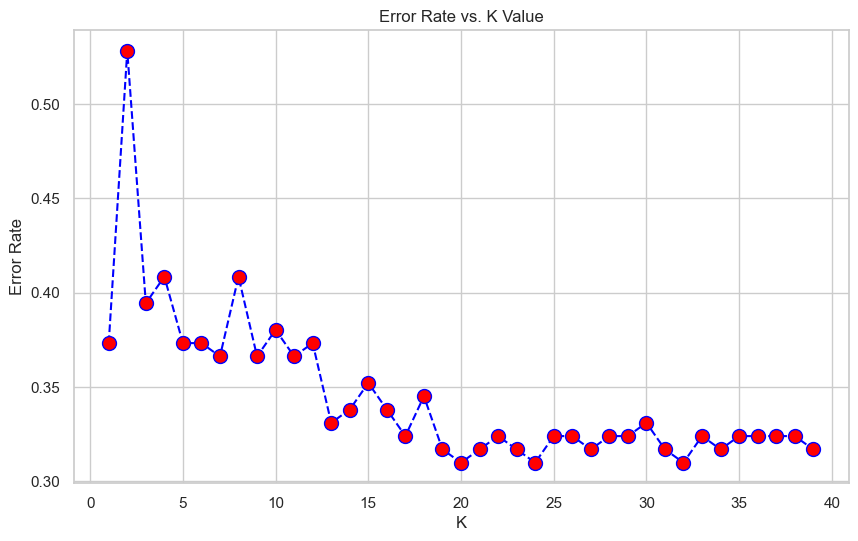

In [209]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_eval)
 error_rate.append(np.mean(pred_i != y_eval))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

<h3>Here we'll choose K=20 since it has the lowest error rate but still not being too small nor too big for it to mess up the model

In [210]:
modelKNN = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

In [211]:
y_pred=modelKNN.predict(X_eval)

In [212]:
print(confusion_matrix(y_eval,y_pred))
print(classification_report(y_eval,y_pred))

[[ 2  1  6]
 [ 1  9 29]
 [ 0  7 87]]
              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.53      0.23      0.32        39
           2       0.71      0.93      0.81        94

    accuracy                           0.69       142
   macro avg       0.64      0.46      0.49       142
weighted avg       0.66      0.69      0.64       142



In [213]:
print(confusion_matrix(y_train,modelKNN.predict(X_train)))
print(classification_report(y_train,modelKNN.predict(X_train)))

[[  5  16  17]
 [  1  39  86]
 [  1  20 239]]
              precision    recall  f1-score   support

           0       0.71      0.13      0.22        38
           1       0.52      0.31      0.39       126
           2       0.70      0.92      0.79       260

    accuracy                           0.67       424
   macro avg       0.64      0.45      0.47       424
weighted avg       0.65      0.67      0.62       424



In [214]:
y_eval

array([1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 2])

In [215]:
y_pred

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2])

<h3> SVC Model

In [216]:
from sklearn.svm import SVC
clf_SVC=  SVC(C=1,kernel='linear')
clf_SVC.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [217]:
print(confusion_matrix(y_eval, clf_SVC.predict(X_eval)))
print(classification_report(y_eval,clf_SVC.predict(X_eval) ))

[[ 3  2  4]
 [ 1 10 28]
 [ 3 13 78]]
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.40      0.26      0.31        39
           2       0.71      0.83      0.76        94

    accuracy                           0.64       142
   macro avg       0.51      0.47      0.48       142
weighted avg       0.61      0.64      0.62       142



In [218]:
print(confusion_matrix(y_train, clf_SVC.predict(X_train)))
print(classification_report(y_train,clf_SVC.predict(X_train) ))

[[ 14   4  20]
 [  4  51  71]
 [  6  18 236]]
              precision    recall  f1-score   support

           0       0.58      0.37      0.45        38
           1       0.70      0.40      0.51       126
           2       0.72      0.91      0.80       260

    accuracy                           0.71       424
   macro avg       0.67      0.56      0.59       424
weighted avg       0.70      0.71      0.69       424



<h3> GaussianNB

In [219]:
from sklearn.naive_bayes import GaussianNB

In [220]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [221]:
print(confusion_matrix(y_eval, gnb.predict(X_eval)))
print(classification_report(y_eval,gnb.predict(X_eval) ))

[[ 6  3  0]
 [ 9 18 12]
 [ 7 36 51]]
              precision    recall  f1-score   support

           0       0.27      0.67      0.39         9
           1       0.32      0.46      0.37        39
           2       0.81      0.54      0.65        94

    accuracy                           0.53       142
   macro avg       0.47      0.56      0.47       142
weighted avg       0.64      0.53      0.56       142



In [222]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

<h3>MLPClassifier

In [250]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)

In [251]:
print(confusion_matrix(y_eval, mlpc.predict(X_eval)))
print(classification_report(y_eval,mlpc.predict(X_eval) ))

[[ 1  2  6]
 [ 1  1 37]
 [ 0  3 91]]
              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.17      0.03      0.04        39
           2       0.68      0.97      0.80        94

    accuracy                           0.65       142
   macro avg       0.45      0.37      0.34       142
weighted avg       0.53      0.65      0.55       142



<h3> DecisionTreeClaasifier

In [264]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0,max_depth=5).fit(X_train, y_train)
print(confusion_matrix(y_eval, DTC.predict(X_eval)))
print(classification_report(y_eval,DTC.predict(X_eval) ))

[[ 1  6  2]
 [ 1 19 19]
 [ 1 27 66]]
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.37      0.49      0.42        39
           2       0.76      0.70      0.73        94

    accuracy                           0.61       142
   macro avg       0.49      0.43      0.44       142
weighted avg       0.62      0.61      0.61       142



[Text(0.6102941176470589, 0.9166666666666666, 'X[41] <= 2.25\ngini = 0.528\nsamples = 424\nvalue = [38, 126, 260]'),
 Text(0.38235294117647056, 0.75, 'X[25] <= 8.55\ngini = 0.438\nsamples = 300\nvalue = [14, 74, 212]'),
 Text(0.23529411764705882, 0.5833333333333334, 'X[16] <= 3.5\ngini = 0.491\nsamples = 234\nvalue = [13, 70, 151]'),
 Text(0.11764705882352941, 0.4166666666666667, 'X[35] <= 1012.75\ngini = 0.323\nsamples = 72\nvalue = [2, 12, 58]'),
 Text(0.058823529411764705, 0.25, 'X[8] <= 1.85\ngini = 0.181\nsamples = 41\nvalue = [2, 2, 37]'),
 Text(0.029411764705882353, 0.08333333333333333, 'gini = 0.099\nsamples = 39\nvalue = [1, 1, 37]'),
 Text(0.08823529411764706, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.17647058823529413, 0.25, 'X[30] <= 3.5\ngini = 0.437\nsamples = 31\nvalue = [0, 10, 21]'),
 Text(0.14705882352941177, 0.08333333333333333, 'gini = 0.308\nsamples = 21\nvalue = [0, 4, 17]'),
 Text(0.20588235294117646, 0.08333333333333333, 'gini =

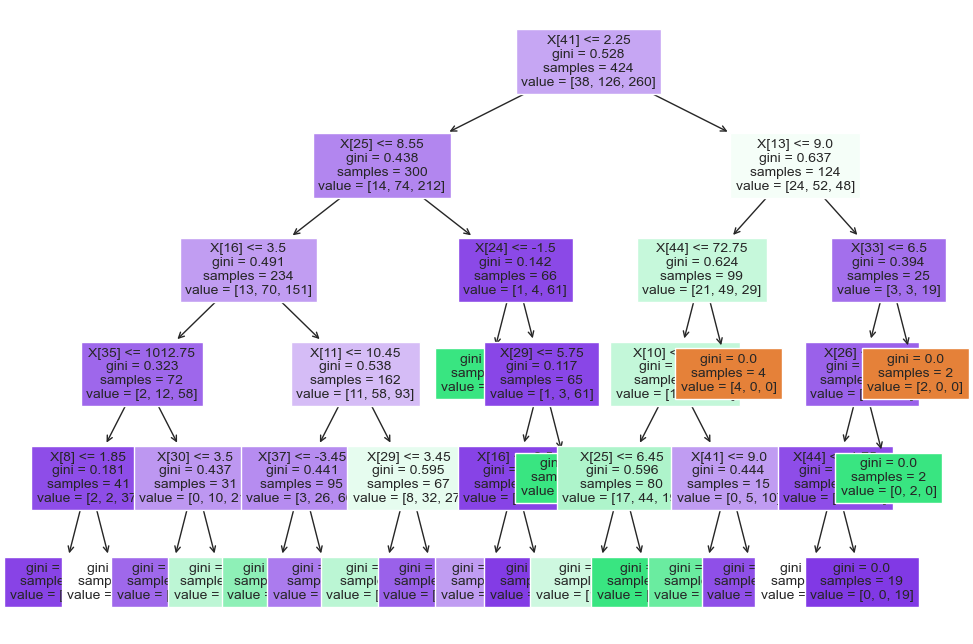

In [265]:
from sklearn import tree
tree.plot_tree(DTC,filled=True, fontsize=10)


In [226]:
from sklearn.model_selection import KFold, cross_val_score

In [227]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(DTC, X, y, cv = k_folds)

In [228]:
scores

array([0.56140351, 0.57522124, 0.60176991, 0.52212389, 0.53982301])

In [229]:
print("Average CV Score: ", scores.mean())

Average CV Score:  0.560068312373855


In [230]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [231]:
scores = cross_val_score(DTC, X, y, cv = skf)

In [232]:
scores

array([0.56140351, 0.52212389, 0.52212389, 0.51327434, 0.53097345])

In [233]:
scores = cross_val_score(mlpc, X, y, cv = skf)
scores

array([0.64912281, 0.5840708 , 0.61946903, 0.55752212, 0.61061947])

<h1> Hyperparameter Tuning using GridSearchCV

In [147]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal, uniform
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
GridSearchCV(SVC(), param_grid).fit(X_train,y_train).best_params_


TypeError: f1_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [234]:
clf_SVC=  SVC(C=100, gamma= 0.0001, kernel= 'rbf')
clf_SVC.fit(X_train, y_train)
print(confusion_matrix(y_eval, clf_SVC.predict(X_eval)))
print(classification_report(y_eval,clf_SVC.predict(X_eval) ))

[[ 3  2  4]
 [ 3  9 27]
 [ 2  7 85]]
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.50      0.23      0.32        39
           2       0.73      0.90      0.81        94

    accuracy                           0.68       142
   macro avg       0.54      0.49      0.49       142
weighted avg       0.65      0.68      0.64       142



In [235]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<h1> Hyperparameter tuning using RandomizedSearchCV

In [236]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [237]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [238]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [241]:
rf = RandomForestClassifier(n_estimators= 600,
 min_samples_split=2,
 min_samples_leaf= 4,

 max_depth= 40,
 bootstrap=True)

In [242]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=4, n_estimators=600)

In [243]:
print(confusion_matrix(y_eval, rf.predict(X_eval)))
print(classification_report(y_eval,rf.predict(X_eval) ))

[[ 1  4  4]
 [ 2  8 29]
 [ 2 11 81]]
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.35      0.21      0.26        39
           2       0.71      0.86      0.78        94

    accuracy                           0.63       142
   macro avg       0.42      0.39      0.39       142
weighted avg       0.58      0.63      0.60       142



<h1> Cross Validating the best models

In [244]:
import time

In [245]:
def cross_val_model(X,y, model, n_splits=3):
    'Do split dataset and calculate cross_score'
    print("Begin training", end='\n\n')
    start = time.time()
    
    X = np.array(X)
    y = np.array(y)
    folds = list(StratifiedKFold(n_splits=n_splits, shuffle=True).split(X, y))

    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]

        print ("Fit %s fold %d" % (str(model).split('(')[0], j+1))
        model.fit(X_train, y_train)
        cross_score = cross_val_score(model, X_holdout, y_holdout, cv=n_splits)
        print("\tcross_score: %.5f" % cross_score.mean())
    
    end = time.time()
    print("\nTraining done! Time Elapsed:", end - start, " seconds.")

In [253]:
cross_val_model(X,y,RFC)

Begin training

Fit RandomForestClassifier fold 1
	cross_score: 0.60847
Fit RandomForestClassifier fold 2
	cross_score: 0.60317
Fit RandomForestClassifier fold 3
	cross_score: 0.64371

Training done! Time Elapsed: 3.099787473678589  seconds.


In [247]:
cross_val_model(X,y,rf)

Begin training

Fit RandomForestClassifier fold 1
	cross_score: 0.58201
Fit RandomForestClassifier fold 2
	cross_score: 0.65608
Fit RandomForestClassifier fold 3
	cross_score: 0.64354

Training done! Time Elapsed: 16.296003818511963  seconds.


In [248]:
cross_val_model(X,y,clf_SVC)

Begin training

Fit SVC fold 1
	cross_score: 0.61376
Fit SVC fold 2
	cross_score: 0.60847
Fit SVC fold 3
	cross_score: 0.58022

Training done! Time Elapsed: 0.14000511169433594  seconds.


In [252]:
cross_val_model(X,y,mlpc)

Begin training

Fit MLPClassifier fold 1
	cross_score: 0.46561
Fit MLPClassifier fold 2
	cross_score: 0.54497
Fit MLPClassifier fold 3
	cross_score: 0.55803

Training done! Time Elapsed: 10.571309804916382  seconds.


In [260]:
cross_val_model(X,y,modelKNN)

Begin training

Fit KNeighborsClassifier fold 1
	cross_score: 0.60847
Fit KNeighborsClassifier fold 2
	cross_score: 0.66138
Fit KNeighborsClassifier fold 3
	cross_score: 0.61717

Training done! Time Elapsed: 0.14072346687316895  seconds.


In [268]:
cross_val_model(X,y,DTC)

Begin training

Fit DecisionTreeClassifier fold 1
	cross_score: 0.53968
Fit DecisionTreeClassifier fold 2
	cross_score: 0.58730
Fit DecisionTreeClassifier fold 3
	cross_score: 0.56383

Training done! Time Elapsed: 0.07799649238586426  seconds.


<h3> rf (RandomForestClassifier with GridSearchCv) is the best model as it gets an average cross_score of 0,62721